In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree 

In [6]:
cd = pd.read_csv('Company_data.csv')
cd.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
cd.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
cd1 = pd.get_dummies(cd,columns=['Urban','US'])
cd1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,0,1,0,1
1,11.22,111,48,16,260,83,Good,65,10,0,1,0,1
2,10.06,113,35,10,269,80,Medium,59,12,0,1,0,1
3,7.40,117,100,4,466,97,Medium,55,14,0,1,0,1
4,4.15,141,64,3,340,128,Bad,38,13,0,1,1,0


In [11]:
cd1['ShelveLoc'] = cd1['ShelveLoc'].replace({'Bad': 1, 'Medium':2,'Good' :3})
cd1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,1,42,17,0,1,0,1
1,11.22,111,48,16,260,83,3,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,1,38,13,0,1,1,0


In [12]:
cd1['Sales'] = cd1['Sales'].astype(int)


In [13]:
X = cd1.drop('ShelveLoc',axis=1)
y= cd1['ShelveLoc']

In [14]:
X

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9,138,73,11,276,120,42,17,0,1,0,1
1,11,111,48,16,260,83,65,10,0,1,0,1
2,10,113,35,10,269,80,59,12,0,1,0,1
3,7,117,100,4,466,97,55,14,0,1,0,1
4,4,141,64,3,340,128,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12,138,108,17,203,128,33,14,0,1,0,1
396,6,139,23,3,37,120,55,11,1,0,0,1
397,7,162,26,12,368,159,40,18,0,1,0,1
398,5,100,79,7,284,95,50,12,0,1,0,1


In [15]:
y

0      1
1      3
2      2
3      2
4      1
      ..
395    3
396    2
397    2
398    1
399    3
Name: ShelveLoc, Length: 400, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=40)

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

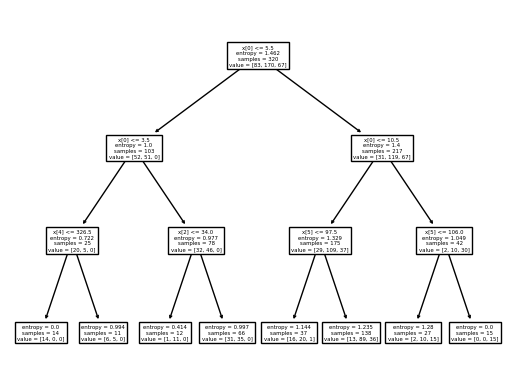

In [18]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);


[Text(0.5, 0.875, 'Sales <= 5.5\nentropy = 1.462\nsamples = 320\nvalue = [83, 170, 67]\nclass = 2'),
 Text(0.25, 0.625, 'Sales <= 3.5\nentropy = 1.0\nsamples = 103\nvalue = [52, 51, 0]\nclass = 1'),
 Text(0.125, 0.375, 'Population <= 326.5\nentropy = 0.722\nsamples = 25\nvalue = [20, 5, 0]\nclass = 1'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0, 0]\nclass = 1'),
 Text(0.1875, 0.125, 'entropy = 0.994\nsamples = 11\nvalue = [6, 5, 0]\nclass = 1'),
 Text(0.375, 0.375, 'Income <= 34.0\nentropy = 0.977\nsamples = 78\nvalue = [32, 46, 0]\nclass = 2'),
 Text(0.3125, 0.125, 'entropy = 0.414\nsamples = 12\nvalue = [1, 11, 0]\nclass = 2'),
 Text(0.4375, 0.125, 'entropy = 0.997\nsamples = 66\nvalue = [31, 35, 0]\nclass = 2'),
 Text(0.75, 0.625, 'Sales <= 10.5\nentropy = 1.4\nsamples = 217\nvalue = [31, 119, 67]\nclass = 2'),
 Text(0.625, 0.375, 'Price <= 97.5\nentropy = 1.329\nsamples = 175\nvalue = [29, 109, 37]\nclass = 2'),
 Text(0.5625, 0.125, 'entropy = 1.144\nsamples

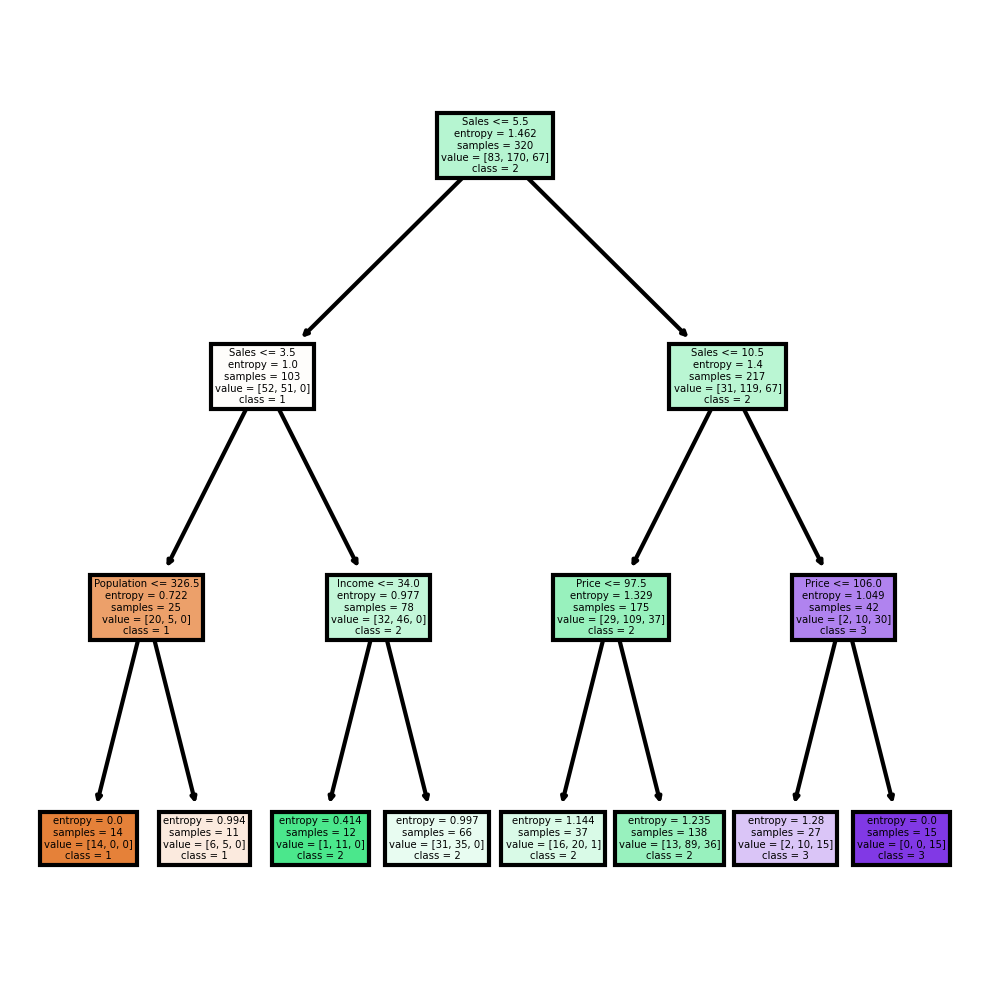

In [19]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [20]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(pred==y_test)

0.625

In [21]:
print(model.score(X_train, y_train)) 
print(model.score(X_test, y_test))

0.640625
0.625
